# FINM HW3

## Part 1

## Pre-reqs

In [10]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2}'.format
sys.path.append("../cmds")
from utils import (
    calc_univariate_regression,
    calc_multivariate_regression,
    plot_correlation_matrix,
    calc_iterative_regression,
    calc_tangency_portfolio,
    plot_capm_regression,
    plot_mv_frontier,
)

import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('factor_pricing_data.xlsx', sheet_name=None, index_col=0)

print(data.keys())

descripts = data['descriptions']
factors = data['factors (excess returns)']
portfolios = data['portfolios (excess returns)']
rf_rate = data['risk-free rate']

#display(descripts)
#display(factors)
#display(portfolios)
#display(rf_rate)

dict_keys(['descriptions', 'factors (excess returns)', 'portfolios (excess returns)', 'risk-free rate'])


## Part 2

### 1. The Factors 

Calculate their univariate performance statistics:
* Mean
* Volatility
* Sharpe
* VaR

In [3]:
def summary_stats(rets, adj_factor=12):
    """
    Given a dataframe of returns, this function returns a dataframe with
    a summary of performance statistics for individual securities.
    """
    stats = {}
    
    stats['Annualized Mean'] = rets.mean() * adj_factor
    stats['Annualized Volatility'] = rets.std() * np.sqrt(adj_factor)
    stats['Annualized Sharpe Ratio'] = (stats['Annualized Mean'] / stats['Annualized Volatility'])
    stats['VaR'] = rets.quantile(0.05, axis=0)
    
    return pd.DataFrame(stats, index=rets.columns)

stats = summary_stats(factors).sort_values("VaR", ascending=False)

display(stats)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,VaR
CMA,0.031,0.073,0.42,-0.027
RMW,0.046,0.083,0.55,-0.03
HML,0.026,0.11,0.24,-0.042
SMB,0.0082,0.1,0.081,-0.043
UMD,0.063,0.15,0.4,-0.068
MKT,0.085,0.16,0.54,-0.074


### 2. 
The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors. Does the construction method succeed
in keeping correlations small?

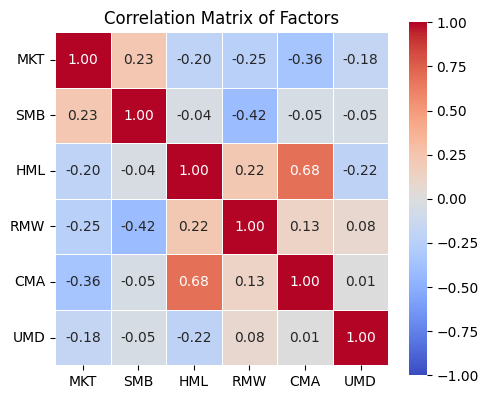

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = plot_correlation_matrix(factors.corr())

ax.set_title("Correlation Matrix of Factors")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment="right")
fig.tight_layout()

I would say a majority of the correlations are 'low' (< 0.3). Around 30% of the correlations are still high however.

### 3. 
Plot the cumulative returns of the factors.

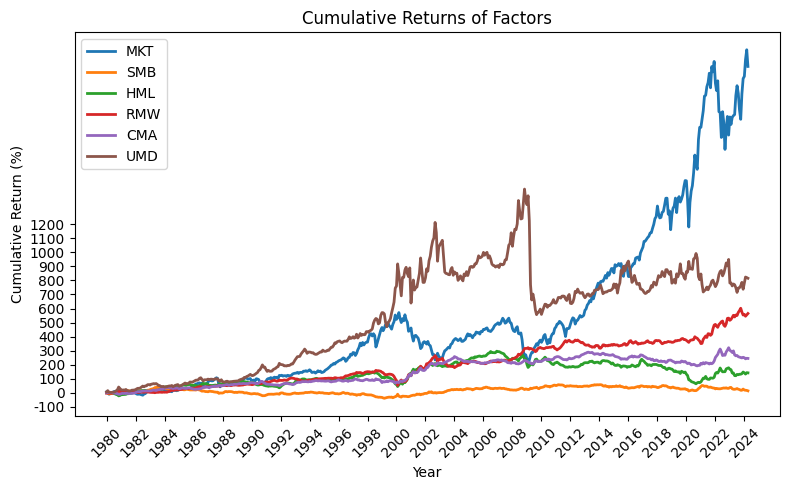

In [13]:
factors_cum = (1 + factors).cumprod() - 1

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(factors_cum.index, factors_cum, lw=2)

# Add a legend.
ax.legend(factors_cum.columns, loc="upper left")


ax.set_xticks(factors_cum.index[::24])
ax.set_xticklabels(factors_cum.index[::24].year, rotation=45)
ax.set_yticks(np.arange(-1, 13, 1))
ax.set_yticklabels(["{:d}".format(x * 100) for x in ax.get_yticks()])
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return (%)")
ax.set_title("Cumulative Returns of Factors")
fig.tight_layout()

### 4. Test assets.
The “assets” tab provides monthly excess return data on various industry stock-portfolios.
Denote these as ri, for n = 1,...,12. Calculate the (annualized) univariate statistics from 1.1

In [5]:
stats = summary_stats(portfolios).sort_values("VaR", ascending=False)

display(stats)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,VaR
Food,0.096,0.15,0.64,-0.059
Util,0.074,0.14,0.54,-0.063
Beer,0.11,0.17,0.68,-0.068
Hshld,0.08,0.15,0.52,-0.069
Drugs,0.1,0.16,0.63,-0.072
Meals,0.1,0.18,0.56,-0.075
Insur,0.096,0.18,0.53,-0.077
Whlsl,0.086,0.18,0.48,-0.077
MedEq,0.099,0.18,0.55,-0.079
Rtail,0.11,0.19,0.6,-0.08


### 5. 
Can the difference in mean excess returns of the portfolios be explained by differences in their
volatilities? Or by their VaR(.05) statistics?


No the difference of mean can not be explained by differences in volatility of VaR. It is possible for volatility and VaR to be similar but mean to be very different. They are not mutually bound in any way. 

## Problem 3

### 1.
For each of the n = 12 test assets, run the CAPM time-series regression

### 2.
Report the estimated βi,mkt, Treynor Ratio, αi, and Information Ratio for each of the n regressions.

In [11]:
mkt = factors[["MKT"]]
capm_regr = calc_iterative_regression(
    portfolios, mkt, intercept=True, one_to_many=True, adj=12
)
display(capm_regr)

,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
Agric,0.021,0.8,0.41,0.33,0.11,0.12,0.015
Food,0.047,0.58,0.35,0.37,0.16,0.39,0.01
Soda,0.047,0.71,0.46,0.25,0.15,0.25,0.016
Beer,0.062,0.63,0.36,0.34,0.18,0.45,0.012
Smoke,0.078,0.62,0.3,0.19,0.21,0.39,0.017
Toys,-0.036,1.1,0.65,0.5,0.052,-0.2,0.015
Fun,0.0068,1.3,0.92,0.6,0.09,0.04,0.014
Books,-0.016,1.1,0.69,0.65,0.07,-0.13,0.01
Hshld,0.022,0.69,0.39,0.5,0.12,0.2,0.0091
Clths,0.004,1.1,0.74,0.57,0.088,0.027,0.012


### 3.
If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

If CAPM were true the alphas and Information Ratio would both be 0 or close to 0 because there is little room for outperformance of the market or benchmark. All Treynor Ratios would be the same.

### 4.
Calculate the mean-absolute-error of the estimated alphas.

If the pricing model worked, should these alpha estimates be large or small? Why? Based on
your MAE stat, does this seem to support the pricing model or not?

In [7]:
mae_alpha = capm_regr["Alpha"].abs().mean()
print(f"MAE for CAPM: {mae_alpha:.4f}")

MAE for CAPM: 0.0202


If the pricing model worked the alpha estimates should be small if CAPM is accurate. A alpha estimate of 2.02% is not small and shows CAPM is not a good pricing model for this data.

## Problem 4

### 1.
For each regression, report the estimated α and r-squared.

In [12]:
multi_factor_regression = calc_iterative_regression(
    portfolios, factors, intercept=True, one_to_many=True, adj=12
)
display(multi_factor_regression)

,Alpha,R-Squared,MKT Beta,SMB Beta,HML Beta,RMW Beta,CMA Beta,UMD Beta,Information Ratio,Tracking Error
Agric,-0.0034,0.36,0.82,0.37,0.073,0.18,0.17,0.064,-0.019,0.015
Food,-0.0024,0.5,0.74,-0.094,-0.025,0.49,0.46,0.015,-0.022,0.0089
Soda,0.0056,0.32,0.83,-0.0029,0.0021,0.53,0.44,-0.11,0.031,0.015
Beer,0.0086,0.45,0.79,-0.12,-0.18,0.57,0.49,0.061,0.068,0.01
Smoke,0.013,0.31,0.83,-0.12,-0.11,0.66,0.82,-0.076,0.069,0.015
Toys,-0.054,0.56,1.1,0.6,-0.2,0.53,0.27,-0.18,-0.33,0.014
Fun,0.031,0.63,1.2,0.3,0.074,0.026,-0.24,-0.22,0.19,0.013
Books,-0.039,0.71,1.1,0.32,0.19,0.35,0.11,-0.091,-0.35,0.0093
Hshld,-0.019,0.59,0.81,-0.063,-0.23,0.49,0.51,-0.014,-0.2,0.0082
Clths,-0.022,0.66,1.1,0.42,0.013,0.76,-0.0003,-0.21,-0.17,0.011


### 2.
Calculate the mean-absolute-error of the estimated alphas.

If the pricing model worked, should these alpha estimates be large or small? Why? Based on
your MAE stat, does this seem to support the pricing model or not?


In [9]:
multi_factor_mae = multi_factor_regression["Alpha"].abs().mean()
print(f"MAE Multi-Factor: {multi_factor_mae:.4f}")

MAE Multi-Factor: 0.0277


Like before, if the pricing model worked the alpha estimates should be small if CAPM is accurate. A alpha estimate of 2.77% is not small and shows CAPM is not a good pricing model for this data.

## Problem 5 (Extensions)